In [1]:
import torch
import dlc_practical_prologue as prologue
from importlib import reload
reload(prologue)
from dlc_practical_prologue import *
import Module, modules, optimizers, helpers
reload(Module)
reload(modules)
reload(helpers)
from modules import *
from helpers import *
from optimizers import *
torch.set_grad_enabled(False)

train_input, train_target, train_classes, test_input, test_target, test_classes = \
       load_random_datasets()

input = torch.Tensor([[2., 4., 6.], [1., 4., 6.], [0.5, 3., 2.], [4.3, 4., 5.],
                      [1.3, 4.1, 6.4], [1.4, 4.1, 6.5], [5, 4., 6.]])
target = torch.Tensor([[2], [1], [1.1], [3], [1.2], [1.21], [3.4]])
nb_epochs = 5

### Standalone Linear Module

In [2]:
model_lin = Linear('fc1', 3, 1)
print_parameters_as_torch(model_lin)

Parameter containing:
tensor([[-0.4593, -0.5606, -0.0493]])
Parameter containing:
tensor([0.8749])


In [3]:
from torch import nn
torch.set_grad_enabled(True)
model_lin_torch = nn.Linear(3, 1)
set_initial_parameters(model_lin, model_lin_torch)
for param in model_lin_torch.parameters():
    print(param)
del nn
torch.set_grad_enabled(False)

def hook(module, grad_input, grad_output):
    for grad in grad_output:
        print("grad_output = ", grad_output[0].t())
        break

Parameter containing:
tensor([[-0.4593, -0.5606, -0.0493]], requires_grad=True)
Parameter containing:
tensor([0.8749], requires_grad=True)


In [4]:
criterion_lin = MSELoss()
optimizer_lin = SGD(model_lin, lr=0.01)

for e in range(nb_epochs):
    optimizer_lin.zero_grad()
    output_lin = model_lin(input)
    loss_lin = criterion_lin(output_lin, target)
    grad_output_lin = criterion_lin.backward()
    print("e = {}, loss = {}, grad_output = {}".format(e, round(loss_lin.item(), 5), grad_output_lin.t()))
    model_lin.backward(grad_output_lin)
    optimizer_lin.step(loss_lin)
 
print()
from torch import nn
torch.set_grad_enabled(True)
    
model_lin_torch.register_backward_hook(hook)     
criterion_lin_torch = nn.MSELoss()
optimizer_lin_torch = torch.optim.SGD(model_lin_torch.parameters(), lr=0.01)

for e in range(nb_epochs):
    optimizer_lin_torch.zero_grad()
    output_lin_torch = model_lin_torch(input)
    loss_lin_torch = criterion_lin_torch(output_lin_torch, target)
    print("e = {}, loss = {}".format(e, round(loss_lin_torch.item(), 5)))
    loss_lin_torch.backward()
    optimizer_lin_torch.step()
    
del nn
torch.set_grad_enabled(False)

e = 0, loss = 22.67716, grad_output = tensor([[-1.3090, -0.8920, -0.6385, -1.8825, -1.0102, -1.0276, -2.1027]])
e = 1, loss = 1.74668, grad_output = tensor([[ 0.1117,  0.4567,  0.0066, -0.4381,  0.4269,  0.4309, -0.4661]])
e = 2, loss = 1.55039, grad_output = tensor([[ 0.0306,  0.3688, -0.0330, -0.4922,  0.3359,  0.3394, -0.5268]])
e = 3, loss = 1.42432, grad_output = tensor([[ 0.0297,  0.3581, -0.0359, -0.4676,  0.3268,  0.3310, -0.4984]])
e = 4, loss = 1.30902, grad_output = tensor([[ 0.0247,  0.3439, -0.0404, -0.4481,  0.3140,  0.3188, -0.4758]])

e = 0, loss = 22.67716
grad_output =  tensor([[-1.3090, -0.8920, -0.6385, -1.8825, -1.0102, -1.0276, -2.1027]])
e = 1, loss = 1.74668
grad_output =  tensor([[ 0.1117,  0.4567,  0.0066, -0.4381,  0.4269,  0.4309, -0.4661]])
e = 2, loss = 1.55039
grad_output =  tensor([[ 0.0306,  0.3688, -0.0330, -0.4922,  0.3359,  0.3394, -0.5268]])
e = 3, loss = 1.42432
grad_output =  tensor([[ 0.0297,  0.3581, -0.0359, -0.4676,  0.3268,  0.3310, -0.4984]]

### Sequential Module

In [5]:
model_seq = Sequential(
    Linear('fc1', 3, 6), 
    ReLU('relu'),
    Linear('fc2', 6, 1), 
    Tanh())
print_parameters_as_torch(model_seq)

Parameter containing:
tensor([[-0.5055, -0.5256, -0.5978],
        [ 0.3847, -0.6245, -0.4432],
        [-0.5773, -0.9464,  0.2816],
        [ 0.9112, -0.0370, -0.0581],
        [ 0.6176, -0.6392,  0.8895],
        [-0.9584, -0.9219, -0.6092]])
Parameter containing:
tensor([-0.1793, -0.0232, -0.4167, -0.0853,  0.2761, -0.3865])
Parameter containing:
tensor([[ 0.0910,  0.5517, -0.0885, -0.4841, -0.0721,  0.1615]])
Parameter containing:
tensor([0.6264])


In [6]:
import Module, modules, helpers
reload(Module)
reload(modules)
reload(helpers)
from modules import *
from helpers import *

from torch import nn
model_seq_torch = nn.Sequential(
    nn.Linear(3, 6),
    nn.ReLU(),
    nn.Linear(6, 1),
    nn.Tanh())
set_initial_parameters(model_seq, model_seq_torch)
for param in model_seq_torch.parameters():
    print(param)
del nn

Parameter containing:
tensor([[-0.5055, -0.5256, -0.5978],
        [ 0.3847, -0.6245, -0.4432],
        [-0.5773, -0.9464,  0.2816],
        [ 0.9112, -0.0370, -0.0581],
        [ 0.6176, -0.6392,  0.8895],
        [-0.9584, -0.9219, -0.6092]], requires_grad=True)
Parameter containing:
tensor([-0.1793, -0.0232, -0.4167, -0.0853,  0.2761, -0.3865],
       requires_grad=True)
Parameter containing:
tensor([[ 0.0910,  0.5517, -0.0885, -0.4841, -0.0721,  0.1615]],
       requires_grad=True)
Parameter containing:
tensor([0.6264], requires_grad=True)


In [7]:
criterion_seq = MSELoss()
optimizer_seq = SGD(model_seq, lr=0.01)

for e in range(nb_epochs):
    optimizer_seq.zero_grad()
    output_seq = model_seq(input)
    loss_seq = criterion_seq(output_seq, target)
    grad_output_seq = criterion_seq.backward()
    print(grad_output_seq.shape)
    print("e = {}, loss = {}, grad_output = {}".format(e, round(loss_seq.item(), 5), grad_output_seq.t()))
    model_seq.backward(grad_output_seq)
    optimizer_seq.step(loss_seq)

print()
from torch import nn
torch.set_grad_enabled(True)
    
model_seq_torch.register_backward_hook(hook)     
criterion_seq_torch = nn.MSELoss()
optimizer_seq_torch = torch.optim.SGD(model_seq_torch.parameters(), lr=0.01)

for e in range(nb_epochs):
    optimizer_seq_torch.zero_grad()
    output_seq_torch = model_seq_torch(input)
    loss_seq_torch = criterion_seq_torch(output_seq_torch, target)
    print("e = {}, loss = {}".format(e, round(loss_seq_torch.item(), 5)))
    loss_seq_torch.backward()
    optimizer_seq_torch.step()
    
del nn
torch.set_grad_enabled(False)

torch.Size([7, 1])
e = 0, loss = 6.12547, grad_output = tensor([[-0.6504, -0.2288, -0.1767, -1.1079, -0.3291, -0.3468, -1.2401]])
torch.Size([7, 1])
e = 1, loss = 4.7175, grad_output = tensor([[-0.4679, -0.1149, -0.1506, -1.0112, -0.1725, -0.1816, -1.1643]])
torch.Size([7, 1])
e = 2, loss = 2.7998, grad_output = tensor([[-0.3443, -0.0590, -0.1388, -0.7835, -0.1107, -0.1119, -0.9055]])
torch.Size([7, 1])
e = 3, loss = 1.87299, grad_output = tensor([[-0.3079, -0.0286, -0.1267, -0.6358, -0.0807, -0.0821, -0.7356]])
torch.Size([7, 1])
e = 4, loss = 1.75919, grad_output = tensor([[-0.3021, -0.0220, -0.1221, -0.6134, -0.0747, -0.0763, -0.7148]])

e = 0, loss = 6.12547
grad_output =  tensor([[-0.6504, -0.2288, -0.1767, -1.1079, -0.3291, -0.3468, -1.2401]])
e = 1, loss = 4.7175
grad_output =  tensor([[-0.4679, -0.1149, -0.1506, -1.0112, -0.1725, -0.1816, -1.1643]])
e = 2, loss = 2.7998
grad_output =  tensor([[-0.3443, -0.0590, -0.1388, -0.7835, -0.1107, -0.1119, -0.9055]])
e = 3, loss = 1.8729

### Tests on mnist-pairs data

In [8]:
nb_hidden1 = 100
nb_hidden2 = 40
train_input = train_input.view(len(train_input), -1)
train_target = train_target.type(torch.FloatTensor)
input_size = train_input.shape[1] # 392
nb_epochs = 100

model_mnist = Sequential(
    Linear('fc1', input_size, nb_hidden1), ReLU(),
    Linear('fc2', nb_hidden1, nb_hidden2), Tanh(),
    Linear('fc3', nb_hidden2, 1))

from torch import nn
model_mnist_torch = nn.Sequential(
    nn.Linear(input_size, nb_hidden1), nn.ReLU(),
    nn.Linear(nb_hidden1, nb_hidden2), nn.Tanh(),
    nn.Linear(nb_hidden2, 1))
set_initial_parameters(model_mnist, model_mnist_torch)
del nn

In [9]:
criterion_mnist = MSELoss()
optimizer_mnist = SGD(model_mnist, lr=0.01)
loss_history_mnist = []

for e in range(nb_epochs):
    optimizer_mnist.zero_grad()
    output_mnist = model_mnist(train_input) # torch.Size([1000, 1])
    loss_mnist = criterion_mnist(output_mnist.flatten(), train_target)
    loss_history_mnist.append(loss_mnist)
    grad_output_mnist = criterion_mnist.backward().view(-1,1)
    #print("e = {}, loss = {}".format(e, round(loss_mnist.item(), 5)))
    model_mnist.backward(grad_output_mnist)
    optimizer_mnist.step(loss_mnist)

print()
from torch import nn
torch.set_grad_enabled(True)
        
criterion_mnist_torch = nn.MSELoss()
optimizer_mnist_torch = torch.optim.SGD(model_mnist_torch.parameters(), lr=0.01)
loss_history_mnist_torch = []

for e in range(nb_epochs):
    optimizer_mnist_torch.zero_grad()
    output_mnist_torch = model_mnist_torch(train_input)
    loss_mnist_torch = criterion_mnist_torch(output_mnist_torch, train_target)
    loss_history_mnist_torch.append(loss_mnist_torch)
    #print("e = {}, loss = {}".format(e, round(loss_mnist_torch.item(), 5)))
    loss_mnist_torch.backward()
    optimizer_mnist_torch.step()
    
del nn
torch.set_grad_enabled(False)

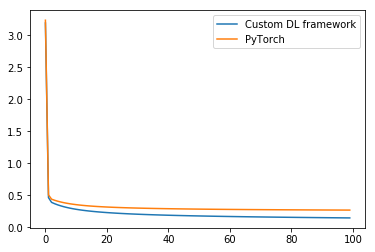

In [11]:
import matplotlib.pyplot as plt
plt.plot(loss_history_mnist, label='Custom DL framework')
plt.plot(loss_history_mnist_torch, label='PyTorch')
plt.legend()
plt.show()